<a href="https://colab.research.google.com/github/cboyda/LighthouseLabs/blob/main/Project_Stats_joining_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Join the Data 
from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
# how to mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_foursquare = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Project-Statistics_city_bikes_FourSquare.csv')

In [5]:
df_yelp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/Project-Statistics_city_bikes_yelp.csv')

In [9]:
merged_df = df_foursquare.merge(df_yelp, on=['city', 'station_name','latitude', 'longitude','empty_slots','slots','free_bikes','ebikes'])

In [10]:
merged_df

,city,station_name,empty_slots,slots,free_bikes,ebikes,latitude,longitude,station_location,location_count,yelp_location_count,yelp_review_count
0,Vancouver,10th & Cambie,22,35,13,4,49.262487,-123.114397,"49.262487,-123.114397",0,8,42
1,Vancouver,Yaletown-Roundhouse Station,6,16,10,0,49.274566,-123.121817,"49.274566,-123.121817",0,14,94
2,Vancouver,Dunsmuir & Beatty,23,26,3,1,49.279764,-123.110154,"49.279764,-123.110154",0,10,61
3,Vancouver,12th & Yukon (City Hall),14,16,2,2,49.260599,-123.113504,"49.260599,-123.113504",0,10,49
4,Vancouver,8th & Ash,15,16,1,0,49.264215,-123.117772,"49.264215,-123.117772",0,9,69
...,...,...,...,...,...,...,...,...,...,...,...,...
237,Vancouver,Burrard & 14th,12,18,4,4,49.259469,-123.145718,"49.259469,-123.145718",0,8,15
238,Vancouver,Hornby & Drake,19,24,5,2,49.277178,-123.130000,"49.277178,-123.13",0,13,176
239,Vancouver,Cardero & Bayshore,2,20,16,1,49.291597,-123.129158,"49.291597,-123.129158",0,12,1251
240,Vancouver,27th & Main,13,22,9,7,49.247204,-123.101549,"49.247204,-123.101549",0,6,173


In [12]:
df = merged_df.copy()

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

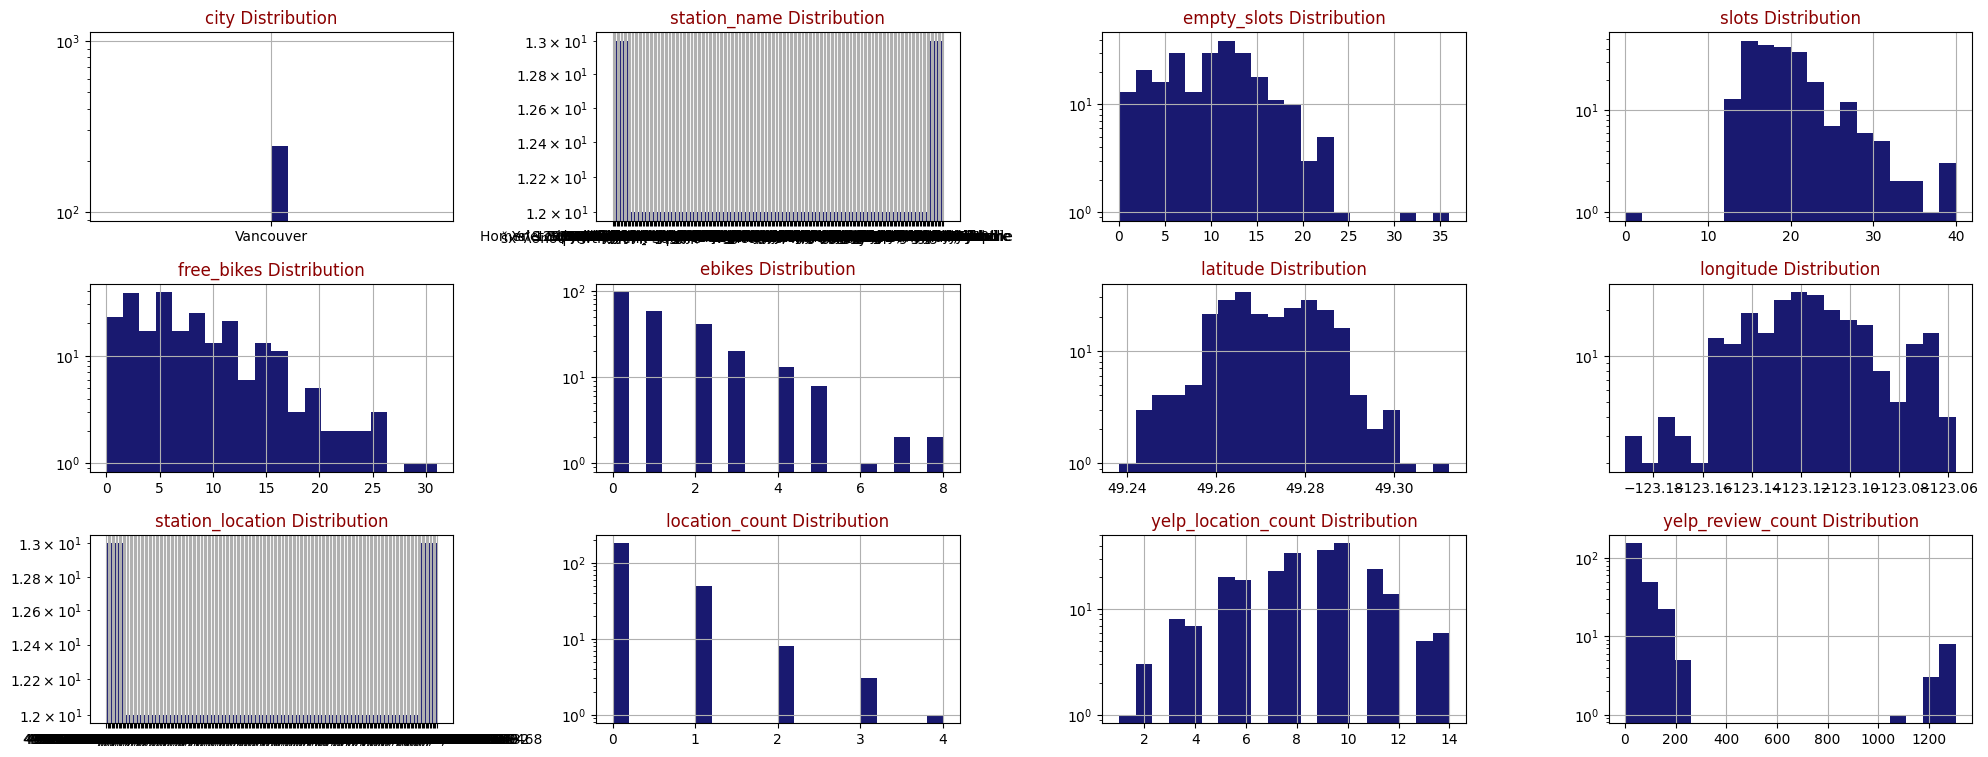

In [14]:
import matplotlib.pyplot as plt

# graph the data to visualize
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,8,4)

In [45]:
# checking for correct datatypes
df.dtypes

city                    object
station_name            object
empty_slots              int64
slots                    int64
free_bikes               int64
ebikes                   int64
latitude               float64
longitude              float64
station_location        object
location_count           int64
yelp_location_count      int64
yelp_review_count        int64
dtype: object

In [29]:
import numpy as np

# define numberical columns
# Assuming your DataFrame is named 'df'
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols

['empty_slots',
 'slots',
 'free_bikes',
 'ebikes',
 'latitude',
 'longitude',
 'location_count',
 'yelp_location_count',
 'yelp_review_count']

In [30]:
# look at counts in each column
df[numeric_cols].value_counts()

empty_slots  slots  free_bikes  ebikes  latitude   longitude    location_count  yelp_location_count  yelp_review_count
0            0      0           0       49.312568  -123.144177  1               2                    21                   1
14           18     4           0       49.285575  -123.061575  1               3                    4                    1
12           18     5           0       49.288011  -123.132006  0               12                   255                  1
                    6           1       49.263518  -123.095680  0               10                   48                   1
                                4       49.262242  -123.081459  0               6                    17                   1
                                                                                                                         ..
8            16     8           0       49.266774  -123.141135  0               10                   101                  1
             

In [44]:
# any nulls?
df.isnull().any(axis=1).any()
# list them df[df.isnull().any(axis=1)]

False

In [25]:
# any duplicates?
df.duplicated().any()

False

In [31]:
import plotly.express as px

#for feature in numerical_features:
for feature in numeric_cols:
  fig = px.histogram(df, x=feature, marginal="box")
  fig.show()

In [36]:
nc = len(numeric_cols)
fig = px.scatter_matrix(df, dimensions=numeric_cols)

fig.update_layout(width= (nc + 1) * 200,
                 height= (nc + 1) * 200,
                 margin=dict(l=0, r=0, t=0, b=0))

fig.show()

In [35]:
# Correlation matrix
#sample from  https://stackoverflow.com/questions/66572672/correlation-heatmap-in-plotly
# Correlation
df_corr = df[numeric_cols].corr().round(1)  
# Mask to matrix
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Viz
df_corr_viz = df_corr.mask(mask).dropna(how='all').dropna(how='all')
# colour variable https://plotly.com/python/colorscales/
fig = px.imshow(df_corr_viz, text_auto=True, color_continuous_scale=[(0.00, "black"),   (0.33, "black"),
                                                     (0.33, "white"), (0.66, "white"),
                                                     (0.66, "blue"),  (1.00, "blue")])
fig.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)




In [93]:
# create database structure
import sqlite3

# Connect to the database (create a new one if it doesn't exist)
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/datasets/city_bikes_sqlite_database.db')
cursor = conn.cursor()

# Create the City table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS City (
        city_ID INTEGER PRIMARY KEY AUTOINCREMENT,
        city TEXT NOT NULL
    )
''')

# Create the Station table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Station (
        station_ID INTEGER PRIMARY KEY AUTOINCREMENT,
        city_ID INTEGER,
        station_name TEXT NOT NULL,
        latitude REAL NOT NULL,
        longitude REAL NOT NULL,
        station_location TEXT NOT NULL,
        FOREIGN KEY (city_ID) REFERENCES City(city_ID)
    )
''')

# Create the Bikes table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Bikes (
        bike_ID INTEGER PRIMARY KEY AUTOINCREMENT,
        station_ID INTEGER,
        empty_slots INTEGER NOT NULL DEFAULT -1,
        slots INTEGER NOT NULL DEFAULT -1,
        free_bikes INTEGER NOT NULL DEFAULT -1,
        ebikes INTEGER NOT NULL DEFAULT -1,
        FOREIGN KEY (station_ID) REFERENCES Station(station_ID)
    )
''')

# Create the Locations table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Locations (
        location_ID INTEGER PRIMARY KEY AUTOINCREMENT,
        station_ID INTEGER,
        location_count INTEGER NOT NULL DEFAULT -1,
        yelp_location_count INTEGER NOT NULL DEFAULT -1,
        yelp_review_count INTEGER NOT NULL DEFAULT -1,
        FOREIGN KEY (station_ID) REFERENCES Station(station_ID)
    )
''')


In [94]:
# initialize all tables as blank

# Get the list of table names in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table'")
table_names = cursor.fetchall()

# Iterate through each table and delete all rows
for table in table_names:
    table_name = table[0]
    cursor.execute(f"DELETE FROM {table_name}")

In [95]:
# Insert data into the City table

# Get unique city names from the dataframe
unique_cities = df['city'].unique()

city_records = [(city,) for city in unique_cities]
cursor.executemany('INSERT INTO City (city) VALUES (?)', city_records)

In [96]:
# Insert data into the Station table
for station_row in df[['station_name', 'latitude', 'longitude', 'station_location', 'city']].itertuples(index=False):
    cursor.execute('''
        INSERT INTO Station (station_name, latitude, longitude, station_location, city_ID)
        SELECT ?, ?, ?, ?, city_ID FROM City WHERE city = ?
    ''', station_row)

In [97]:
# Insert data into the Bikes table
for bikes_row in df[['empty_slots', 'slots', 'free_bikes', 'ebikes', 'station_name']].itertuples(index=False):
    cursor.execute('''
        INSERT INTO Bikes (empty_slots, slots, free_bikes, ebikes, station_ID)
        SELECT ?, ?, ?, ?, station_ID FROM Station WHERE station_name = ?
    ''', bikes_row)

In [98]:
# Insert data into the Locations table
for locations_row in df[['location_count', 'yelp_location_count', 'yelp_review_count', 'station_name']].itertuples(index=False):
    cursor.execute('''
        INSERT INTO Locations (location_count, yelp_location_count, yelp_review_count, station_ID)
        SELECT ?, ?, ?, station_ID FROM Station WHERE station_name = ?
    ''', locations_row)

### Experiment with Graph_Tool for Visualization of Database Schema

In [76]:
# Installing graph-tool (https://graph-tool.skewed.de)

In [85]:
# FAILS to install graph_tool
# takes 40 seconds to run
# !echo "deb http://downloads.skewed.de/apt focal main" >> /etc/apt/sources.list
# !apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
# !apt-get update
# !apt-get install python3-graph-tool python3-matplotlib python3-cairo

In [84]:
# FAILED to install graph_tool
# !echo "deb http://downloads.skewed.de/apt focal main" >> /etc/apt/sources.list
# !apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
# !apt-get update
# !apt-get install python3-graph-tool python3-matplotlib python3-cairo

In [80]:
  # FAILS with error:
  # Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  # ERROR: Could not find a version that satisfies the requirement graph-tool (from versions: none)
  # ERROR: No matching distribution found for graph-tool
# !apt update
# !apt install python3-cairo libcairo2-dev
# !pip install pycairo
# !pip install graph-tool

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:7 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:8 http://downloads.skewed.de/apt focal InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
36 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Target

In [86]:
# 2 minutes to run and graph_tool still fails
# found on https://colab.research.google.com/drive/1cj5GF8QMb0eCtsdNLuTa0jZmOKvVKb3s?usp=sharing#scrollTo=6KxPtNPhLFZx
# and looked dangerous
# ! wget -O miniconda.sh https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh 
# ! chmod +x miniconda.sh
# ! bash ./miniconda.sh -b -f -p /usr/local
# ! rm miniconda.sh
# ! conda config --add channels conda-forge
# ! conda install -qy mamba
# ! mamba update -qy --all

In [87]:
visualize = False

if visualize:
  # create visualization of database relationship
  import graph_tool.all as gt

  # Retrieve table information
  cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
  tables = cursor.fetchall()

  # Create a graph
  g = gt.Graph(directed=True)

  # Add nodes for each table
  node_map = {}
  for table in tables:
      node = g.add_vertex()
      node_map[table[0]] = node

  # Add edges for table relationships
  for table in tables:
      cursor.execute(f"PRAGMA foreign_key_list({table[0]})")
      foreign_keys = cursor.fetchall()
      for fk in foreign_keys:
          source_node = node_map[table[0]]
          target_node = node_map[fk[2]]
          g.add_edge(source_node, target_node)

  # Visualize the graph
  gt.graph_draw(g, output="relationship_diagram.png", output_size=(800, 800), vertex_text=g.vertex_index, vertex_font_size=12)


In [91]:
# FAILs on Google Colab
# !pip install sqlalchemy-utils

In [90]:
# doesn't work on Google Colab but may locally
visualize = False

if visualize:
  from sqlalchemy_utils import visualize_models
  from myapp.models import Base

  graph = visualize_models(Base)
  graph.view()


### Database Schema Visualization

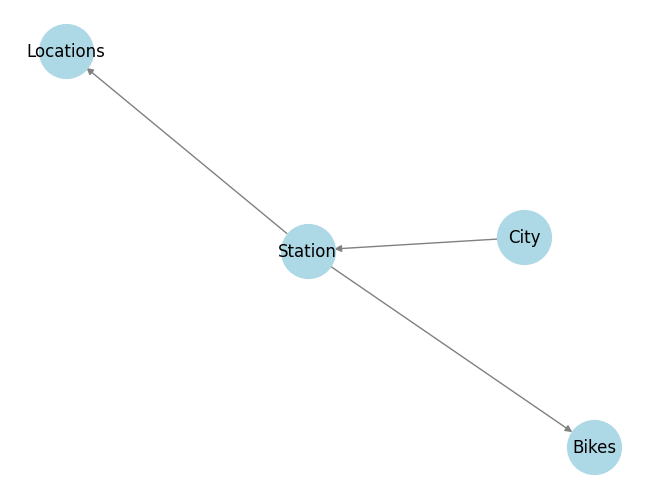

In [99]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_nodes_from(['City', 'Station', 'Bikes', 'Locations'])

# Add edges
G.add_edge('City', 'Station')
G.add_edge('Station', 'Bikes')
G.add_edge('Station', 'Locations')

# Draw the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1500, edge_color='gray', arrows=True)
plt.show()


Look at the data before and after the join to validate your data.

# Verify dataframe properly entered into database

In [100]:
# validate what we have inserted, how many rows was in our dataframe?
df.shape[0]

242

In [101]:
# VERIFY City Table with Unique Names
# Execute the SELECT query
cursor.execute('SELECT * FROM City')

# Fetch all rows
rows = cursor.fetchall()

# Display the count of total rows
print("Total rows:", len(rows))

# Display the results
for row in rows:
    print(row)

Total rows: 1
(1, 'Vancouver')


In [102]:
# VERIFY Station Table 
# Execute the SELECT query
cursor.execute('SELECT * FROM Station')

# Fetch all rows
rows = cursor.fetchall()

# Display the count of total rows
print("Total rows:", len(rows))

# Display the results
for row in rows:
    print(row)

Total rows: 242
(1, 1, '10th & Cambie', 49.262487, -123.114397, '49.262487,-123.114397')
(2, 1, 'Yaletown-Roundhouse Station', 49.274566, -123.121817, '49.274566,-123.121817')
(3, 1, 'Dunsmuir & Beatty', 49.279764, -123.110154, '49.279764,-123.110154')
(4, 1, '12th & Yukon (City Hall)', 49.260599, -123.113504, '49.260599,-123.113504')
(5, 1, '8th & Ash', 49.264215, -123.117772, '49.264215,-123.117772')
(6, 1, 'Spyglass & Seawall', 49.270877, -123.115103, '49.270877,-123.115103')
(7, 1, 'Stamps Landing', 49.26893, -123.11813, '49.26893,-123.11813')
(8, 1, 'Ontario & Seawall', 49.271721, -123.104207, '49.271721,-123.104207')
(9, 1, 'Canada Place', 49.287214, -123.11287, '49.287214,-123.11287')
(10, 1, 'Granville & Georgia', 49.282409, -123.118541, '49.282409,-123.118541')
(11, 1, 'Pender & Burrard', 49.287097, -123.118551, '49.287097,-123.118551')
(12, 1, 'Marinaside & Davie', 49.273471, -123.118016, '49.273471,-123.118016')
(13, 1, 'Robson & Hornby', 49.282758, -123.122092, '49.282758,-

In [103]:
# VERIFY Bikes Table 
# Execute the SELECT query
cursor.execute('SELECT * FROM Bikes')

# Fetch all rows
rows = cursor.fetchall()

# Display the count of total rows
print("Total rows:", len(rows))

# Display the results
for row in rows:
    print(row)

Total rows: 242
(1, 1, 22, 35, 13, 4)
(2, 2, 6, 16, 10, 0)
(3, 3, 23, 26, 3, 1)
(4, 4, 14, 16, 2, 2)
(5, 5, 15, 16, 1, 0)
(6, 6, 2, 14, 12, 0)
(7, 7, 7, 14, 7, 1)
(8, 8, 0, 20, 20, 0)
(9, 9, 13, 26, 13, 2)
(10, 10, 16, 20, 4, 3)
(11, 11, 14, 26, 12, 2)
(12, 12, 12, 22, 10, 0)
(13, 13, 22, 30, 7, 0)
(14, 14, 20, 22, 2, 2)
(15, 15, 19, 20, 1, 1)
(16, 16, 16, 20, 4, 0)
(17, 17, 10, 14, 4, 0)
(18, 18, 9, 22, 13, 1)
(19, 19, 3, 18, 14, 1)
(20, 20, 9, 14, 5, 0)
(21, 21, 17, 18, 1, 1)
(22, 22, 15, 15, 0, 0)
(23, 23, 9, 14, 5, 0)
(24, 24, 8, 14, 6, 0)
(25, 25, 11, 12, 1, 1)
(26, 26, 15, 22, 7, 0)
(27, 27, 15, 32, 17, 0)
(28, 28, 1, 28, 26, 3)
(29, 29, 0, 16, 14, 4)
(30, 30, 8, 14, 6, 0)
(31, 31, 2, 26, 24, 2)
(32, 32, 12, 26, 13, 2)
(33, 33, 23, 30, 7, 4)
(34, 34, 5, 14, 9, 0)
(35, 35, 6, 22, 16, 2)
(36, 36, 23, 28, 5, 1)
(37, 37, 11, 14, 3, 1)
(38, 38, 7, 14, 7, 2)
(39, 39, 13, 14, 1, 0)
(40, 40, 11, 14, 3, 2)
(41, 41, 1, 20, 20, 1)
(42, 42, 13, 18, 5, 5)
(43, 43, 0, 18, 17, 2)
(44, 44, 3, 28

In [104]:
# VERIFY Locations Table 
# Execute the SELECT query
cursor.execute('SELECT * FROM Locations')

# Fetch all rows
rows = cursor.fetchall()

# Display the count of total rows
print("Total rows:", len(rows))

# Display the results
for row in rows:
    print(row)

Total rows: 242
(1, 1, 0, 8, 42)
(2, 2, 0, 14, 94)
(3, 3, 0, 10, 61)
(4, 4, 0, 10, 49)
(5, 5, 0, 9, 69)
(6, 6, 3, 11, 73)
(7, 7, 4, 10, 76)
(8, 8, 1, 7, 34)
(9, 9, 0, 6, 56)
(10, 10, 0, 9, 48)
(11, 11, 0, 7, 37)
(12, 12, 2, 13, 86)
(13, 13, 0, 10, 49)
(14, 14, 0, 9, 74)
(15, 15, 0, 11, 87)
(16, 16, 0, 11, 79)
(17, 17, 0, 11, 67)
(18, 18, 0, 10, 64)
(19, 19, 0, 11, 244)
(20, 20, 1, 8, 1213)
(21, 21, 0, 12, 94)
(22, 22, 0, 11, 80)
(23, 23, 2, 14, 114)
(24, 24, 0, 10, 1292)
(25, 25, 0, 9, 152)
(26, 26, 0, 12, 166)
(27, 27, 0, 9, 74)
(28, 28, 0, 11, 66)
(29, 29, 1, 10, 63)
(30, 30, 0, 10, 56)
(31, 31, 2, 12, 75)
(32, 32, 0, 8, 138)
(33, 33, 0, 11, 58)
(34, 34, 2, 11, 79)
(35, 35, 1, 8, 130)
(36, 36, 0, 10, 87)
(37, 37, 0, 10, 68)
(38, 38, 0, 10, 45)
(39, 39, 0, 7, 16)
(40, 40, 0, 10, 51)
(41, 41, 0, 8, 39)
(42, 42, 0, 10, 46)
(43, 43, 0, 9, 86)
(44, 44, 1, 11, 151)
(45, 45, 0, 11, 69)
(46, 46, 0, 13, 74)
(47, 47, 1, 10, 76)
(48, 48, 0, 10, 165)
(49, 49, 0, 11, 1294)
(50, 50, 0, 10, 1292)
(

All tables have the complete dataframe captured in the SQLite database = CONFIRMED

In [105]:
# Commit the changes and close the connection
conn.commit()
conn.close()